# Load Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import glob
import re
from tqdm import tqdm

import plotly.graph_objects as go

# proprocessing
from sklearn import preprocessing
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation 
from keras.layers import LSTM
from keras.models import load_model
import matplotlib.pyplot as plt
import h5py
import datetime
import tensorflow as tf

2023-06-11 14:36:08.432825: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-11 14:36:09.079795: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2023-06-11 14:36:09.826013: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-11 14:36:09.851733: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-11 14:36:09.851927: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
def plot(df,x_feature_name,y_feature_name,title):
    """
    This function takes two dataframes as input and plots the number of calls per day and per week.

    Args:
    daily_df (pandas.DataFrame): A dataframe containing daily call data.
    weekly_df (pandas.DataFrame): A dataframe containing weekly call data.

    Returns:
    None
    """

    # Create a subplot with two rows and one column
    # fig = make_subplots(rows=2, cols=1)
    fig = go.Figure()
    # Add a trace for daily calls
    fig.add_trace(
        go.Scatter(
            x=df[x_feature_name],
            y=df[y_feature_name],
            name=y_feature_name,
            mode='lines+markers'
        ))

 

    # Update xaxis properties
    fig.update_xaxes(title_text='Date')

    # Update yaxis properties
    fig.update_yaxes(title_text=y_feature_name)

    # Update title and height
    fig.update_layout(
        title=f'{title}',
        height=500,
        width=1200
    )

    # Show the plot
    fig.show()

    # Write the plot to an HTML file
    # fig.write_html(f'Visualization/btc.html')



In [4]:
def downsample_dataframe(df, downsampling_frequency, fill_method='mean'):
  """
  Downsamples a DataFrame and fills missing values.

  Args:
    df: The DataFrame to downsample.
    downsampling_frequency: The frequency to downsample the DataFrame to.
    fill_method: The method to use to fill missing values.

  Returns:
    The downsampled DataFrame.
  """

  # Convert the Timestamp column to a datetime object.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])

  # Set the index of the DataFrame to the Timestamp column.
  df = df.set_index('Timestamp')

  # Fill the missing values.
  if fill_method == 'mean':
    df = df.fillna(df.mean())
  elif fill_method == 'median':
    df = df.fillna(df.median())
  else:
    raise ValueError('Invalid fill_method: {}'.format(fill_method))

  # Downsample the DataFrame.
  df = df.resample(downsampling_frequency).mean()
  return df
  # Check if any missing values were created after downsampling.
  if df.isna().any():
    df = df.fillna(df.mean())

  return df





In [5]:
path_lists = glob.glob('GreenD_reduced_version_03/'+'*.csv')
sorted_file_paths = sorted(path_lists)
def extract_digits(string):
    # Extract digits from the string using regular expression
    digits = re.findall(r'\d+', string)
    return int(digits[0]) if digits else 0

sorted_file_paths = sorted(path_lists, key=extract_digits)
print(sorted_file_paths)

conct_list = []
for path in tqdm(sorted_file_paths ,desc='processing'):
    
    data = pd.read_csv(path)
    data['Timestamp'] = pd.to_datetime(data['Timestamp'],utc=True,unit='s')#format='%Y-%m-%d %H-%M-%S')
    data['Timestamp'] = data['Timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
    conct_list.append(data)
!mkdir 'Combined-Dataset-version-03'
df = pd.concat(conct_list)


['GreenD_reduced_version_03/greend_dataset_466.csv', 'GreenD_reduced_version_03/greend_dataset_341.csv', 'GreenD_reduced_version_03/greend_dataset_137.csv', 'GreenD_reduced_version_03/greend_dataset_32.csv', 'GreenD_reduced_version_03/greend_dataset_370.csv', 'GreenD_reduced_version_03/greend_dataset_35.csv', 'GreenD_reduced_version_03/greend_dataset_180.csv', 'GreenD_reduced_version_03/greend_dataset_204.csv', 'GreenD_reduced_version_03/greend_dataset_114.csv', 'GreenD_reduced_version_03/greend_dataset_377.csv', 'GreenD_reduced_version_03/greend_dataset_338.csv', 'GreenD_reduced_version_03/greend_dataset_179.csv', 'GreenD_reduced_version_03/greend_dataset_363.csv', 'GreenD_reduced_version_03/greend_dataset_80.csv', 'GreenD_reduced_version_03/greend_dataset_78.csv', 'GreenD_reduced_version_03/greend_dataset_464.csv', 'GreenD_reduced_version_03/greend_dataset_74.csv', 'GreenD_reduced_version_03/greend_dataset_365.csv', 'GreenD_reduced_version_03/greend_dataset_387.csv', 'GreenD_reduced_

processing: 100%|██████████| 472/472 [00:28<00:00, 16.52it/s]

mkdir: cannot create directory ‘Combined-Dataset-version-03’: File exists


In [6]:
df.sort_values(by='Timestamp',inplace=True)

<Figure size 800x600 with 0 Axes>

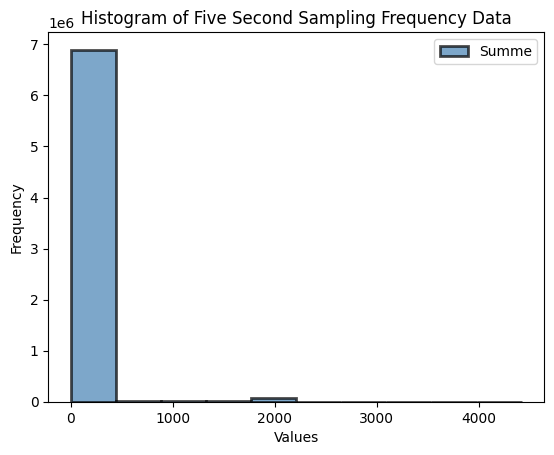

In [7]:
import matplotlib.pyplot as plt

# Customize the histogram plot
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot the histogram
df.plot.hist(
    bins=10,                   # Number of bins
    edgecolor='black',         # Color of the edges of the bars
    alpha=0.7,                 # Transparency of the bars
    color='steelblue',         # Color of the bars
    linewidth=2,               # Width of the bar edge lines
)

# Customize the plot labels and title
plt.title('Histogram of Five Second Sampling Frequency Data')    # Set the title
plt.xlabel('Values')              # Set the x-axis label
plt.ylabel('Frequency')           # Set the y-axis label

# Show the plot
plt.savefig('5sec.png')

plt.show()


In [8]:

# Downsample the DataFrame to 1-hour frequency and fill missing values using mean imputation.
df_1_hour = downsample_dataframe(df, '1H', fill_method='mean')
df_1_hour.reset_index('Timestamp',inplace=True)
df_1_hour.fillna(method='ffill',inplace=True)

# Downsample the DataFrame to 1-hour frequency and fill missing values using mean imputation.
df_daily = downsample_dataframe(df, '24H', fill_method='mean')
df_daily.reset_index('Timestamp',inplace=True)
df_daily.fillna(method='ffill',inplace=True)



<Figure size 800x600 with 0 Axes>

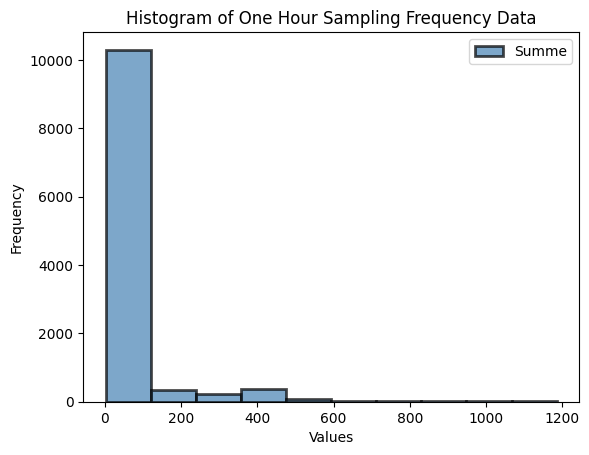

In [9]:
import matplotlib.pyplot as plt

# Customize the histogram plot
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot the histogram
df_1_hour.plot.hist(
    bins=10,                   # Number of bins
    edgecolor='black',         # Color of the edges of the bars
    alpha=0.7,                 # Transparency of the bars
    color='steelblue',         # Color of the bars
    linewidth=2,               # Width of the bar edge lines
)

# Customize the plot labels and title
plt.title('Histogram of One Hour Sampling Frequency Data')    # Set the title
plt.xlabel('Values')              # Set the x-axis label
plt.ylabel('Frequency')           # Set the y-axis label

# Show the plot
plt.savefig('1-Hours.png')

plt.show()


In [10]:
# df_1_hour.dropna(inplace=True)

In [11]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=15):
    """_summary_

    Args:
        dataset (_type_): _description_
        look_back (int, optional): _description_. Defaults to 15.

    Returns:
        _type_: _description_
    """
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        # print('Value of a : {}'.format(a))
        # print('Value of y : {}'.format(dataset[i + look_back, 0]))
    return np.array(dataX), np.array(dataY)

In [12]:
data_df = df_1_hour

In [13]:
plot(data_df,x_feature_name='Timestamp',y_feature_name='Summe',title='Sampling Frequency 1 Hours')



In [14]:
plot(df_daily,x_feature_name='Timestamp',y_feature_name='Summe',title='Sampling Frequency Daily')



In [15]:
import numpy as np
import math
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

def create_dataset(data, look_back=20):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

data_df = df_1_hour # Your data dataframe

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(data_df['Summe'].values.reshape(-1, 1))

# split into train, validation, and test sets
train_size = int(len(dataset) * 0.7)
val_size = int(len(dataset) * 0.2)
test_size = len(dataset) - train_size - val_size

train_data = dataset[:train_size]
val_data = dataset[train_size:train_size+val_size]
test_data = dataset[train_size+val_size:]

# create train, validation, and test datasets
look_back = 20
x_train, y_train = create_dataset(train_data, look_back)
x_val, y_val = create_dataset(val_data, look_back)
x_test, y_test = create_dataset(test_data, look_back)

# reshape the input data
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_val = np.reshape(x_val, (x_val.shape[0], 1, x_val.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

# print the sizes of the datasets
print('Training Data Size:', train_data.shape)
print('Validation Data Size:', val_data.shape)
print('Testing Data Size:', test_data.shape)


Training Data Size: (7973, 1)
Validation Data Size: (2278, 1)
Testing Data Size: (1140, 1)


In [16]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# Model Building | Fitting

In [17]:

# Check if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU is available.")
    print("List of physical GPUs:")
    for device in physical_devices:
        print(device)
else:
    print("GPU is not available. Using CPU instead.")

GPU is available.
List of physical GPUs:
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

# Set the model parameters
num_epochs = 100
batch_size = 16
num_layers = 4
input_window=20

# Create the LSTM model
model = Sequential()
model.add(LSTM(input_window, input_shape=(1, look_back), return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(30, return_sequences=True))
model.add(LSTM(5, return_sequences=True))

model.add(Dense(1))

# Compile the model
model.compile(loss='mean_absolute_error', optimizer='adam')

# Get the model's parameters
model_params = model.count_params()

# Create the model name based on parameters and training settings
model_name = f"model_{num_epochs}_epochs_{batch_size}_batch_{num_layers}_layers_{model_params}_params_input_window_{input_window}"


# Define early stopping callback
early_stopping = EarlyStopping(patience=10,
                               monitor = 'val_loss', 
                               restore_best_weights=True)

# Define TensorBoard callback with model-specific log folder
tb_callback = TensorBoard(log_dir=f'logs/{model_name}/', write_graph=True, update_freq='epoch')

# Define model checkpoint callback with model-specific filename
checkpoint_callback = ModelCheckpoint(f'checkpoints/{model_name}_{{epoch:02d}}.h5', save_weights_only=True, save_best_only=True)

# Train the model with early stopping, checkpoints, and TensorBoard
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), 
                    epochs=num_epochs, 
                    batch_size=batch_size, 
                    verbose=2,
                    callbacks=[early_stopping, tb_callback, checkpoint_callback])

# Print model summary
print(model.summary())


2023-06-11 14:36:54.652515: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-11 14:36:54.652781: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-11 14:36:54.652933: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/100


2023-06-11 14:36:55.943181: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-11 14:36:55.944438: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-11 14:36:55.945833: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

498/498 - 11s - loss: 0.0331 - val_loss: 0.0312 - 11s/epoch - 22ms/step
Epoch 2/100
498/498 - 4s - loss: 0.0324 - val_loss: 0.0309 - 4s/epoch - 7ms/step
Epoch 3/100
498/498 - 4s - loss: 0.0323 - val_loss: 0.0311 - 4s/epoch - 8ms/step
Epoch 4/100
498/498 - 7s - loss: 0.0322 - val_loss: 0.0332 - 7s/epoch - 14ms/step
Epoch 5/100
498/498 - 5s - loss: 0.0321 - val_loss: 0.0307 - 5s/epoch - 11ms/step
Epoch 6/100
498/498 - 4s - loss: 0.0321 - val_loss: 0.0327 - 4s/epoch - 8ms/step
Epoch 7/100
498/498 - 4s - loss: 0.0321 - val_loss: 0.0321 - 4s/epoch - 8ms/step
Epoch 8/100
498/498 - 3s - loss: 0.0320 - val_loss: 0.0317 - 3s/epoch - 7ms/step
Epoch 9/100
498/498 - 3s - loss: 0.0319 - val_loss: 0.0314 - 3s/epoch - 7ms/step
Epoch 10/100
498/498 - 3s - loss: 0.0317 - val_loss: 0.0307 - 3s/epoch - 7ms/step
Epoch 11/100
498/498 - 4s - loss: 0.0311 - val_loss: 0.0293 - 4s/epoch - 7ms/step
Epoch 12/100
498/498 - 4s - loss: 0.0302 - val_loss: 0.0286 - 4s/epoch - 8ms/step
Epoch 13/100
498/498 - 5s - loss

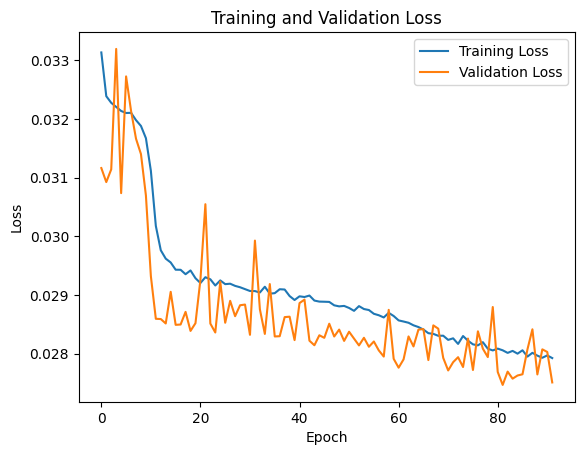

In [19]:
import matplotlib.pyplot as plt

# Get the training and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
 
# Plot the training loss and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


# Testing Data

In [20]:
Results_test = {}
y_hat = model.predict(x_test)
y_hat_inversed = min_max_scaler.inverse_transform(y_hat.reshape(-1,1)).flatten().tolist()
y_test_inversed = min_max_scaler.inverse_transform(y_test.reshape(-1,1)).flatten().tolist()

Results_test['y_hat'] =y_hat_inversed
Results_test['y_test'] =y_test_inversed
Results_test['Index'] = np.arange(0, len(y_test_inversed))
results_df_test = pd.DataFrame.from_dict(Results_test)
display(results_df_test)


# Plotting
fig = go.Figure()
fig.add_trace(go.Scatter(x=results_df_test['Index'], y=results_df_test['y_hat'], name='Predicted',mode='markers+lines'))
fig.add_trace(go.Scatter(x=results_df_test['Index'], y=results_df_test['y_test'], name='Actual' ,mode='markers+lines'))
fig.update_layout(
            xaxis_title='Index',
            yaxis_title='Value',
            title='Tesing Data Predicted vs Actual Curves'
        )
fig.show()

2023-06-11 14:48:08.230455: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-11 14:48:08.232555: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-11 14:48:08.234696: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

35/35 [==============================] - 1s 2ms/step


,y_hat,y_test,Index
0,31.457701,30.400977,0
1,28.893730,37.112743,1
2,28.801561,144.535865,2
3,36.129696,296.136337,3
4,191.658249,251.992852,4
...,...,...,...
1115,31.017918,80.591582,1115
1116,30.223532,52.420814,1116
1117,35.504944,46.189453,1117
1118,33.662186,58.697892,1118


In [21]:

Results_train = {}

# for Training data 
y_train_hat = model.predict(x_train)
y_train_hat_inversed = min_max_scaler.inverse_transform(y_train_hat.reshape(-1,1)).flatten().tolist()
y_train_inversed = min_max_scaler.inverse_transform(y_train.reshape(-1,1)).flatten().tolist()

Results_train['y_train_hat'] =y_train_hat_inversed
Results_train['y_train'] =y_train_inversed
Results_train['Index'] = np.arange(0, len(y_train_inversed))
results_df_train = pd.DataFrame.from_dict(Results_train)
display(results_df_train)



# Plotting
fig = go.Figure()
fig.add_trace(go.Scatter(x=results_df_train['Index'], y=results_df_train['y_train_hat'], name='Predicted',mode='markers+lines'))
fig.add_trace(go.Scatter(x=results_df_train['Index'], y=results_df_train['y_train'], name='Actual' ,mode='markers+lines'))
fig.update_layout(
            xaxis_title='Index',
            yaxis_title='Value',
            title='Tesing Data Predicted vs Actual Curves'
        )

fig.show()



2023-06-11 14:48:13.584864: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-11 14:48:13.586240: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-11 14:48:13.587450: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

249/249 [==============================] - 2s 3ms/step


,y_train_hat,y_train,Index
0,24.015047,14.910907,0
1,24.861574,27.189141,1
2,23.627817,14.690256,2
3,25.772650,25.137112,3
4,23.709145,77.481583,4
...,...,...,...
7948,27.810493,22.058251,7948
7949,26.516811,21.902966,7949
7950,27.185965,19.812983,7950
7951,27.090876,24.107081,7951


In [ ]:
results_df_test

In [22]:
import numpy as np

def calculate_errors(predicted, actual):
    # Convert lists to numpy arrays
    predicted = np.array(predicted)
    actual = np.array(actual)

    # Mean Absolute Error (MAE)
    mae = np.mean(np.abs(predicted - actual))

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(np.mean((predicted - actual) ** 2))

    # Mean Squared Error (MSE)
    mse = np.mean((predicted - actual) ** 2)

    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100

    return mae, rmse, mse, mape
train_mae , train_rmse , train_mse,train_mape = calculate_errors(results_df_train['y_train_hat'],results_df_train['y_train'])
test_mae , test_rmse , test_mse,test_mape = calculate_errors(results_df_test['y_hat'],results_df_test['y_test'])

In [23]:
import pandas as pd

# Read the existing error history DataFrame from CSV
error_history = pd.read_csv('errorDatabaseHistory.csv')

# Create a new record as a DataFrame
new_record = pd.DataFrame({
    'modelName': [model_name],
    'modelConfig': [model.get_config()],
    'train_rmse': [train_rmse],
    'train_mae': [train_mae],
    'train_mse': [train_mse],
    'train_mape': [train_mape],
    'test_rmse': [test_rmse],
    'test_mae': [test_mae],
    'test_mse': [test_mse],
    'test_mape': [test_mape]
})

# Append the new record to the existing error history DataFrame
error_history = pd.concat([error_history, new_record], ignore_index=True)

# Save the updated error history DataFrame to CSV
error_history.to_csv('errorDatabaseHistory.csv', index=False)


# Final

In [24]:
error_history

,modelName,modelConfig,train_rmse,train_mae,train_mse,train_mape,test_rmse,test_mae,test_mse,test_mape
0,dummay,"{'name': 'sequential', 'layers': [{'class_name...",106.952965,37.845231,11438.936808,43.444817,100.377466,33.736318,10075.635652,31.138548
1,LSTM-1,"{'name': 'sequential_1', 'layers': [{'class_na...",107.001591,37.658871,11449.340578,42.081336,100.424096,33.689043,10084.999132,30.586461
2,LSTM-3,"{'name': 'sequential_2', 'layers': [{'class_na...",102.783347,35.152541,10564.416399,40.623763,95.789844,32.560890,9175.694187,32.079805
3,LSTM-3,"{'name': 'sequential_3', 'layers': [{'class_na...",103.251317,35.915562,10660.834426,41.728774,96.362199,32.164169,9285.673437,30.291995
4,LSTM-4,"{'name': 'sequential_4', 'layers': [{'class_na...",101.024638,34.280913,10205.977487,40.162043,97.659436,32.383993,9537.365444,30.588478
5,LSTM-4,"{'name': 'sequential_5', 'layers': [{'class_na...",100.126802,33.332858,10025.376493,38.057775,97.091345,32.904764,9426.729279,32.145660
6,model_100_epochs_16_batch_3_layers_10126_param...,"{'name': 'sequential_14', 'layers': [{'class_n...",101.016434,33.369855,10204.319865,40.264601,93.264508,30.088759,8698.268419,30.238130
7,model_100_epochs_16_batch_4_layers_27926_param...,"{'name': 'sequential', 'layers': [{'class_name...",100.671157,33.040876,10134.681881,39.109739,93.469514,30.084497,8736.549997,29.420120
